In [8]:
import numpy as np
import matplotlib.pyplot as plt

#### 1a) 
Use an Euler-Maryana scheme to simulate 50 realisations of the SDE with L = 100, $\lambda^{\sim}$ = 1.5. Try $X_{0} = 0.5$ and $X_{0} = 1$. For each simulation do 5000 timesteps with $\delta t = 0.01$. Describe behaviours of $X_{t}$.

In [63]:
def SDE(lamda, L, X, dt):
    return (lamda*X*(1-X)-X)*dt + np.sqrt((1/L)*(lamda*X*(1-X)+X)*dt)*np.random.normal()

def euler_maryana(X_0, dt, num_timesteps, lamda, L):
    x = [X_0]
    for i in range(0, num_timesteps):
        x.append(x[-1] + SDE(lamda, L, x[-1], dt))
    return x


In [64]:
L = 100
lamda = 1.5
X_0 = 0.5
dt = 0.01
num_steps = 5000

num_iterations = 50


#for i in range(0, num_iterations): 
x = euler_maryana(X_0, dt, num_steps, lamda, L)

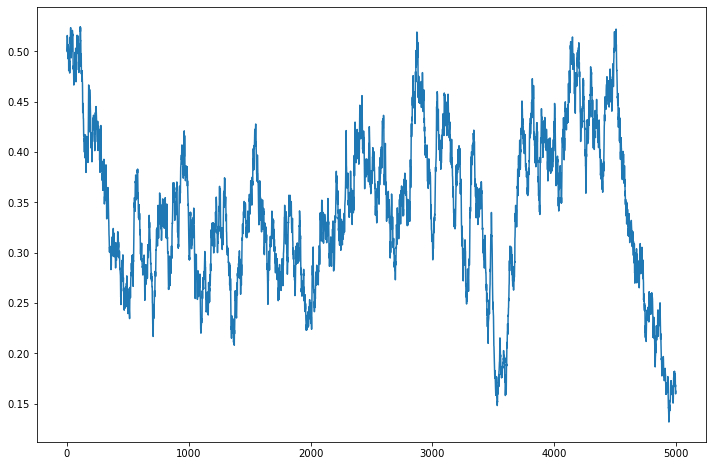

In [65]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(x)
plt.show()

Due to discrete timestep and noise, as the population becomes small the diffusive function becomes very very small so that the noise may cause the function to become negative which will not work as cannot square root negative number. So should use a timestep that is adaptive with the population size. Why above cannot do lots of iterations because some break.

#### 1c)
Repeat but use SDE with additive noise, (diffusion function replaced by a constant):
$$dY_{t} = (\lambda Y_{t} (1 - Y_{t})dt + \frac{1}{10} dW_{t}$$

In [66]:
def additive_SDE(lamda, L, Y, dt):
    return (lamda*Y*(1-Y)-Y)*dt + (1/10)*np.sqrt(dt)*np.random.normal()

def euler_maryana1(X_0, dt, num_timesteps, lamda, L):
    x = [X_0]
    for i in range(0, num_timesteps):
        x.append(x[-1] + additive_SDE(lamda, L, x[-1], dt))
    return x

In [67]:
Y_0 = 0.5
X_0 = 0.5
num_steps = 8000

X_t = euler_maryana(X_0, dt, num_steps, lamda, L)
Y_t = euler_maryana1(Y_0, dt, num_steps, lamda, L)

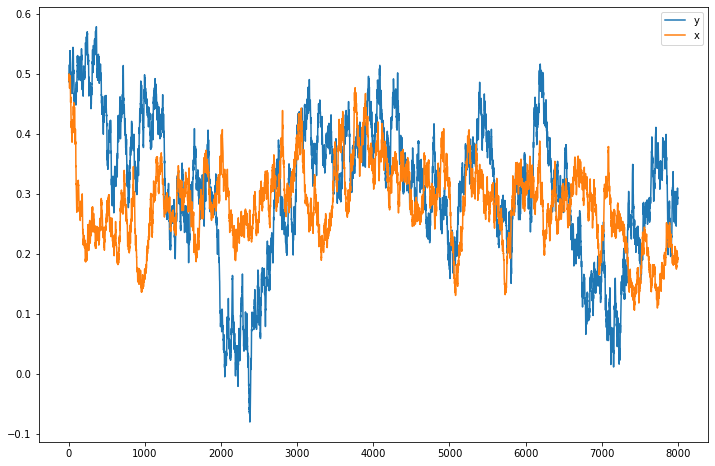

In [68]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(Y_t, label = 'y')
ax.plot(X_t, label = 'x')
ax.legend()
plt.show()

This explodes because when it goes negative, although there is no square root it can still be evaluted, the negative value emphasises more negative movement until negative infinity is reached. This would have been a problem in the previous method but it broke when zero was reached.

should be fixed by using multiplicative noise and smaller timesteps

- behaviour of the two is the same
- if population bigger need to think about additive noise???


### Section 2
Approximating fluctuations around a steady state
 $X_{t}$ often remains near a quasi-steady state at $\hat{X} = 1 - \frac{1}{\lambda} = \frac{1}{3}$
 $\hat{X}$ is quasi-steady as $f(\hat{X}) = 0$ but $D(\hat{X}) = \frac{2}{L}(1-\frac{1}{\lambda}) > 0$, so there is still diffusion happening at $\hat{X}$.
 
We can define new process $Z_{t} = X_{t} - \hat{X}$, describing fluctuations around steady state. Using first order approx:
$$f(\hat{X} + Z) \sim f(\hat{X}) + Zf'(\hat{X}) = - Z(\lambda - 1)$$

as $f(\hat{X}) = 0$ we can then sub these into before to get approx of SDE.

In [69]:
def steady_SDE(Z, lamda, L, dt):
    return -(lamda -1)*Z*dt + np.sqrt((2/L)*(1-(1/lamda))*dt)*np.random.normal()

def euler_maryana2(Z_0, dt, num_timesteps, lamda, L):
    x = [Z_0]
    for i in range(0, num_timesteps):
        x.append(x[-1] + steady_SDE(x[-1], lamda, L, dt))
    return x

In [70]:
Z_0 = 0
num_steps = 50000
L = 100
lamda = 1.5

dt = 0.01


num_iterations = 50

Z = euler_maryana2(Z_0, dt, num_steps, lamda, L)

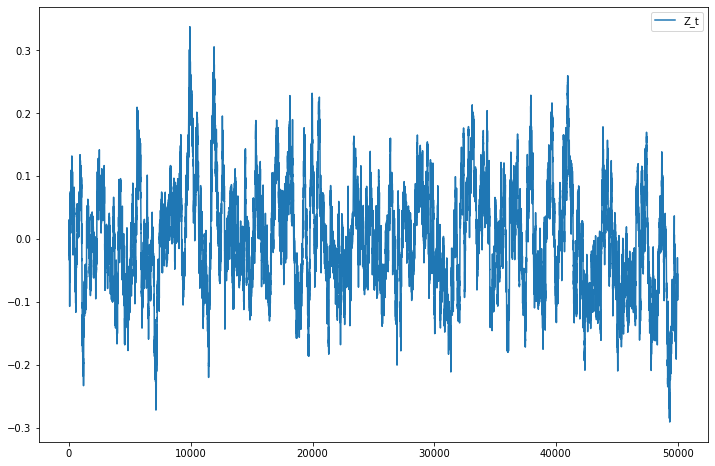

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(Z, label = 'Z_t')
ax.legend()
plt.show()

In [74]:
x_hat = 1/3

num_steps = 50000
X_t = euler_maryana(x_hat, dt, num_steps, lamda, L)

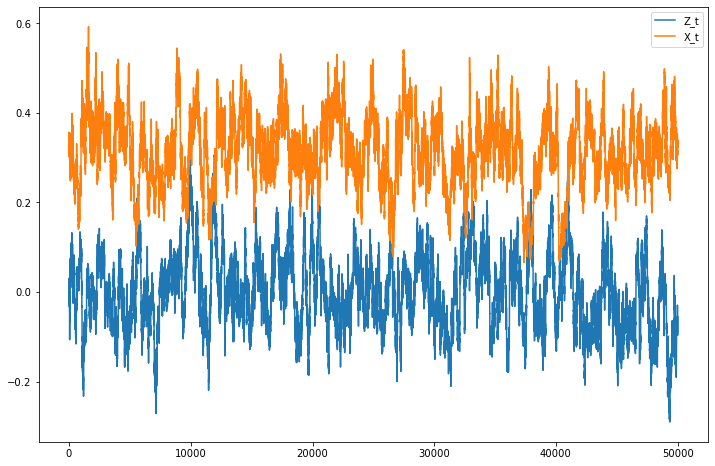

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(Z, label = 'Z_t')
ax.plot(X_t, label = 'X_t')
ax.legend()
plt.show()

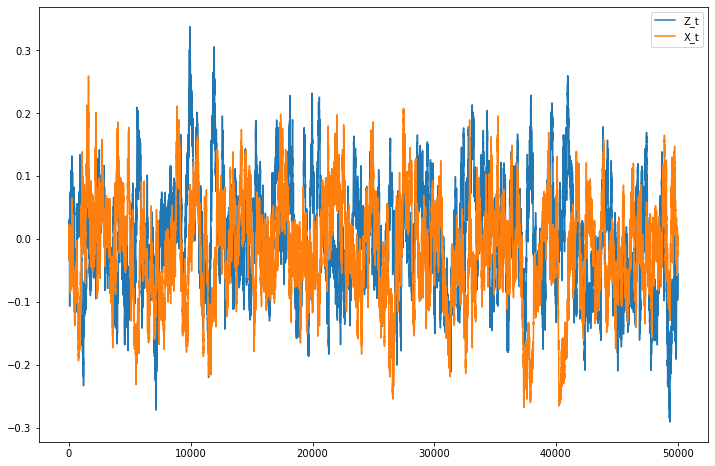

In [77]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

ax.plot(Z, label = 'Z_t')
ax.plot(np.array(X_t) - x_hat, label = 'X_t')
ax.legend()
plt.show()

In [78]:
print(np.var(np.array(Z)))
print(np.var(np.array(X_t)))

0.00709536565204819
0.006336190731650074


the variances are similar as expected